## 2. Perform the following preprocessing tasks on the dirty_iris datasetii.
i) Calculate the number and percentage of observations that are complete.

ii) Replace all the special values in data with NA.

iii) Define these rules in a separate text file and read them.

(Use editfile function in R (package editrules). Use similar function in Python). Print the resulting constraint object.

– Species should be one of the following values: setosa, versicolor or virginica.

– All measured numerical properties of an iris should be positive.

– The petal length of an iris is at least 2 times its petal width.

– The sepal length of an iris cannot exceed 30 cm.

– The sepals of an iris are longer than its petals.

iv)Determine how often each rule is broken (violatedEdits). Also summarize and plot the result.

v) Find outliers in sepal length using boxplot and boxplot.stats

In [58]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load dirty_iris dataset
df = pd.read_csv('https://raw.githubusercontent.com/edwindj/datacleaning/master/data/dirty_iris.csv')

In [9]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


#### i)

In [12]:
# number of complete observations
complete_obs = df.notnull().all(axis=1).sum()
print("Number of complete observations:", complete_obs)

# percentage of complete observations
percent_complete_obs = round(complete_obs / len(df) * 100, 2)
print("Percentage of complete observations:", percent_complete_obs, "%")

Number of complete observations: 96
Percentage of complete observations: 64.0 %


#### ii)

In [13]:
# Replace all special values with NaN
df.replace(['?', '*', '#'], np.nan, inplace=True)

# View the first 5 rows of the dataset
df.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


#### iii)

In [33]:
def check_species(df):
    x = df['Species'].apply(lambda x: x in {'setosa', 'versicolor', 'virginica'}) 
    violations = len(df) - np.sum(x)
    
    if violations == 0: 
        print('No Violation.')

    else:
        print('Violation: Invalid Species Name.') 
        print(f'Violations: {violations}')
    
    return violations

In [34]:
species_violations = check_species(df)

No Violation.


In [35]:
def check_all_positive(df):
    x = df.loc[:, 'Sepal.Length':'Petal.Width'].apply(lambda x: x > 0).values 
    x = x.reshape(-1)
    violations = len(df) * 4 - np.sum(x)
    
    if violations == 0: 
        print('No Violation.')

    else:
        print('Violation: Non-positive Numerical Property.') 
        print(f'Violations: {violations}')
    
    return violations

In [36]:
non_positive_violations = check_all_positive(df)

Violation: Non-positive Numerical Property.
Violations: 62


In [41]:
def check_petal_length(df):
    x = df['Petal.Length'] >= 2 * df['Petal.Width'] 
    violations = x.value_counts().loc[False]

    if violations == 0: 
        print('No Violation.')

    else:
        print('Violation: Petal Length is less than twice its Petal Width.') 
        print(f'Violations: {violations}')

    return violations

In [42]:
petal_length_violations = check_petal_length(df)

Violation: Petal Length is less than twice its Petal Width.
Violations: 34


In [44]:
def check_sepal_length(data):
    x = data['Sepal.Length'] <= 30 
    violations = x.value_counts().loc[False]

    if violations == 0: 
        print('No Violation.')

    else:
        print('Violation: Sepal Length exceeded the value of 30cms.') 
        print(f'Violations: {violations}')
    
    return violations

In [46]:
sepal_length_violations = check_sepal_length(df)

Violation: Sepal Length exceeded the value of 30cms.
Violations: 12


In [49]:
def check_sepal_petal_length(df):
    x = df['Sepal.Length'] > df['Petal.Length'] 
    violations = x.value_counts().loc[False]

    if violations == 0: 
        print('No Violation.')

    else:
        print('Violation: Sepal Length are less than Petal Length.') 
        print(f'Violations: {violations}')

    return violations

In [50]:
sepal_petal_violations = check_sepal_petal_length(df)

Violation: Sepal Length are less than Petal Length.
Violations: 30


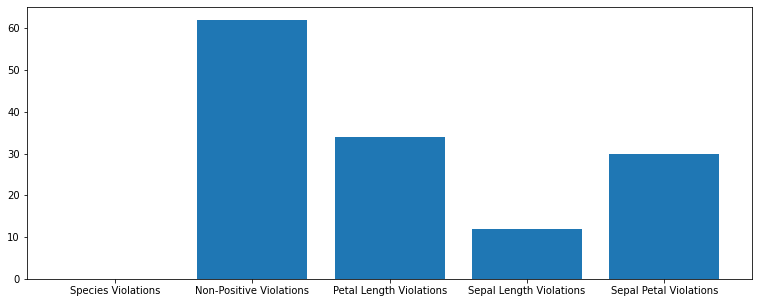

In [52]:
rule_break_frequency = {
    'Species Violations': species_violations, 
    'Non-Positive Violations': non_positive_violations, 
    'Petal Length Violations': petal_length_violations, 
    'Sepal Length Violations': sepal_length_violations, 
    'Sepal Petal Violations': sepal_petal_violations
}
fig = plt.figure(figsize=(13, 5)) 
plt.bar(rule_break_frequency.keys(), rule_break_frequency.values()) 
plt.show()

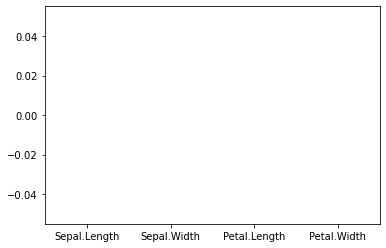

In [59]:
x = [df[col] for col in df.columns[:-1]]

box = plt.boxplot(x, labels=df.columns[:-1], patch_artist=True)

plt.show()

In [60]:
print(box.keys())

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])


In [61]:
outliers = [item.get_ydata() for item in box['fliers']] 
print(f'Outliers in Sepal Length: {outliers[0]}')

Outliers in Sepal Length: []


### chatgpt


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dirty_iris = pd.read_csv('dirty_iris.csv')


In [ ]:
# Calculate the number and percentage of complete observations
complete_obs = dirty_iris.dropna()
num_complete_obs = len(complete_obs)
pct_complete_obs = (num_complete_obs / len(dirty_iris)) * 100

print("Number of complete observations:", num_complete_obs)
print("Percentage of complete observations:", pct_complete_obs)


In [ ]:
# Replace all special values with NA
dirty_iris = dirty_iris.replace(to_replace=["?", "Iris-setossa", "Iris-versicolour"], value=np.nan)


In [ ]:
def check_rules(row):
    # Rule 1: Species should be one of the following values: setosa, versicolor or virginica.
    species = row['Species']
    if species not in ['setosa', 'versicolor', 'virginica']:
        return False
    
    # Rule 2: All measured numerical properties of an iris should be positive.
    for prop in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
        if row[prop] <= 0:
            return False
    
    # Rule 3: The petal length of an iris is at least 2 times its petal width.
    petal_length = row['PetalLengthCm']
    petal_width = row['PetalWidthCm']
    if petal_length < 2 * petal_width:
        return False
    
    # Rule 4: The sepal length of an iris cannot exceed 30 cm.
    sepal_length = row['SepalLengthCm']
    if sepal_length > 30:
        return False
    
    # Rule 5: The sepals of an iris are longer than its petals.
    if sepal_length <= petal_length:
        return False
    
    return True


In [ ]:
# Apply the check_rules function to each row of the dataset
rule_violations = dirty_iris.apply(lambda row: [rule for rule in range(1, 6) if not check_rules(row)] , axis=1)

# Count the number of times each rule is violated
violation_counts = rule_violations.apply(lambda x: pd.Series(x).value_counts()).fillna(0).astype(int).sum()

# Summarize the results
print("Number of times each rule is violated:")
print(violation_counts)

In [ ]:
# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=violation_counts.index, y=violation_counts.values)
plt.title("Number of times each rule is violated")
plt.xlabel("Rule number")
plt.ylabel("Count")
plt.show()


In [ ]:
# Create a boxplot of sepal length
plt.figure(figsize=(8, 6))
sns.boxplot(x=dirty_iris["SepalLengthCm"])
plt.title("Boxplot of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.show()

# Use boxplot.stats to find outliers
stats = boxplot.stats(dirty_iris["SepalLengthCm"])
print("Outliers in Sepal Length:")
print(stats["fliers"])
